# Import the excel file

In [39]:
import pandas as pd
df = pd.read_excel('/content/combined_emails_with_natural_pii.xlsx')
df

,email,type
0,Subject: Unvorhergesehener Absturz der Datenan...,Incident
1,Subject: Customer Support Inquiry\n\nSeeking i...,Request
2,Subject: Data Analytics for Investment\n\nI am...,Request
3,Subject: Krankenhaus-Dienstleistung-Problem\n\...,Incident
4,"Subject: Security\n\nDear Customer Support, I ...",Request
...,...,...
23995,Subject: Problem mit der HP DeskJet 3755 WLAN-...,Problem
23996,Subject: Problemas com a impressora HP DeskJet...,Incident
23997,Subject: Problema urgente con el envÃ­o\n\nEst...,Incident
23998,"Subject: \n\nCher Service Client, nous rencont...",Incident


# Search for languages

In [114]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=7775635de42ed37861427e9680b2207fced3403e1049a3ab926d87b058c96fbb
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [40]:
from langdetect import detect
df['language'] = df['email'].apply(lambda x: detect(x))

In [41]:
df.to_csv('combined_emails_with_natural_pii.csv', index=False)

In [86]:
import pandas as pd
df = pd.read_csv('/content/combined_emails_with_natural_pii.csv')
df.head()

,email,type,language
0,Subject: Unvorhergesehener Absturz der Datenan...,Incident,de
1,Subject: Customer Support Inquiry\n\nSeeking i...,Request,en
2,Subject: Data Analytics for Investment\n\nI am...,Request,en
3,Subject: Krankenhaus-Dienstleistung-Problem\n\...,Incident,de
4,"Subject: Security\n\nDear Customer Support, I ...",Request,en


In [87]:
df.columns

Index(['email', 'type', 'language'], dtype='object')

In [44]:
df['language'].unique()

array(['de', 'en', 'fr', 'nl', 'pt', 'it', 'es'], dtype=object)

In [45]:
for lang in df['language'].unique():
  print(lang, len(df[df['language'] == lang]))

de 6908
en 15316
fr 483
nl 8
pt 471
it 1
es 813


In [88]:
# Separate personal check

df_english = df[df['language'] == 'en']
df_german = df[df['language'] == 'de']
df_french = df[df['language'] == 'fr']
df_spanish = df[df['language'] == 'es']
df_italian = df[df['language'] == 'it']
df_portuguese = df[df['language'] == 'pt']
df_dutch = df[df['language'] == 'nl']



In [47]:
df['type'].unique()

array(['Incident', 'Request', 'Problem', 'Change'], dtype=object)

In [48]:
for amount in df['type'].unique():
  print(amount, len(df[df['type'] == amount]))

Incident 9586
Request 6860
Problem 5037
Change 2517


In [49]:
df.values

array([['Subject: Unvorhergesehener Absturz der Datenanalyse-Plattform\n\nDie Datenanalyse-Plattform brach unerwartet ab, da die SpeicheroberflÃ¤che zu gering war My name is Sophia Rossi.. Ich habe versucht, Laravel 8 und meinen MacBook Pro neu zu starten, aber das Problem behÃ¤lt sich bei. Ich benÃ¶tige Ihre UnterstÃ¼tzung, um diesen Fehler zu beheben. You can reach me at janesmith@company.com.',
        'Incident', 'de'],
       ['Subject: Customer Support Inquiry\n\nSeeking information on digital strategies that can aid in brand growth and details on the available services. Looking forward to learning more to help our business grow My name is Elena Ivanova.. Thank you, and I look forward to hearing from you soon. You can reach me at fatima.farsi@help.com.',
        'Request', 'en'],
       ['Subject: Data Analytics for Investment\n\nI am contacting you to request information on data analytics tools that can be utilized with the Eclipse IDE for enhancing investment optimization. I am

In [50]:
df.isna().sum()

,0
email,0
type,0
language,0


# Masking using spacy and regex

In [118]:
# spacy.cli.download("en_core_web_sm")
# spacy.cli.download("xx_ent_wiki_sm")

✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import re
from tqdm import tqdm

nlp = spacy.load("en_core_web_sm")
nlp_multi = spacy.load("xx_ent_wiki_sm")

# PII_PATTERNS = {
#     "full_name": r'(?i)(?:(?<=my name is\s)[A-Z][a-z]+\s[A-Z][a-z]+|(?<=this is\s)[A-Z][a-z]+\s[A-Z][a-z]+)',
#     "email": r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',
#     "phone_number": r'\b(?:\+?\d{1,3})?[\s.-]?\(?\d{2,4}\)?[\s.-]?\d{3,5}[\s.-]?\d{3,5}\b',
#     "dob": r'\b(?:\d{1,2}[/-])?(?:\d{1,2}[/-])?\d{2,4}\b',
#     "aadhar_num": r'\b\d{4}[\s-]?\d{4}[\s-]?\d{4}\b',
#     "credit_debit_no": r'\b(?:\d[ -]*?){13,16}\b',
#     "cvv_no": r'\b\d{3}\b',
#     "expiry_no": r'\b(0[1-9]|1[0-2])\/\d{2,4}\b'
# }

# PII_PATTERNS = {
#     "full_name": r'(?i)(?:(?<=my name is\s)[A-Z][a-z]+\s[A-Z][a-z]+|(?<=this is\s)[A-Z][a-z]+\s[A-Z][a-z]+)',
#     "email": r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',
#     "phone_number": r'(?:\+\d{1,3}[-\s.]?\d{1,4}[-\s.]?\d{1,4}[-\s.]?\d{1,10}|\b\d{3}[-\s.]?\d{3}[-\s.]?\d{4}\b)',
#     "dob": r'(?:(?:born|birth|dob|birthday)(?:\s+(?:on|date|is|:))?\s+)?\d{1,2}[/-]\d{1,2}[/-]\d{2,4}',
#     "aadhar_num": r'(?<![-\s])\b\d{4}(?:[-\s]\d{4}){2}\b(?![-\s])',
#     "credit_debit_no": r'\b(?:\d{4}(?:[-\s]\d{4}){3}|\d{13,16})\b',
#     "cvv_no": r'(?:cvv|cvc|security code|card code)[\s:]*\d{3,4}|\b\d{3,4}\b(?=\s*(?:is my cvv|security code))',
#     "expiry_no": r'\b(?:exp|expiry|expiration|valid thru|valid until)[\s:]*(?:\d{1,2}[/-]\d{2,4})|\b(?:0[1-9]|1[0-2])[/-]\d{2,4}\b'
# }

PII_PATTERNS = {
    # "full_name": r'(?i)(?:(?<=my name is\s)[A-Z][a-z]+\s[A-Z][a-z]+(?!\s?[a-z]+)|(?<=this is\s)[A-Z][a-z]+\s[A-Z][a-z]+(?!\s?[a-z]+))',
    "email": r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',
    "phone_number": r'(?:\+\d{1,3}[-\s.]?\d{1,4}[-\s.]?\d{1,4}[-\s.]?\d{1,10}|\b\d{3}[-\s.]?\d{3}[-\s.]?\d{4}\b)',
    "dob": (r"(?i)(?:born|birth|dob|birthday)(?:\s+(?:on|date|is|:))?\s+(?P<dob>(\d{1,2}[/-]\d{1,2}[/-]\d{2,4}|\d{1,2}[ -](?:January|February|March|April|May|June|July|August|September|October|November|December)[ -]\d{4}))"),
    "credit_debit_no": r'(?:^[0-9]{4}[0-9]{4}[0-9]{4}[0-9]{4}$)|(?:^[0-9]{4}\s[0-9]{4}\s[0-9]{4}\s[0-9]{4}$)|(?:^[0-9]{4}-[0-9]{4}-[0-9]{4}-[0-9]{4}$)|(?:\b\d{4}[-\s]?\d{4}[-\s]?\d{4}[-\s]?\d{4}\b)',
    "aadhar_num": r'(?:^[0-9]{4}[0-9]{4}[0-9]{4}$)|(?:^[0-9]{4}\s[0-9]{4}\s[0-9]{4}$)|(?:^[0-9]{4}-[0-9]{4}-[0-9]{4}$)|(?:\b\d{4}[-\s]?\d{4}[-\s]?\d{4}\b)',
    "cvv_no": r'(?:CVV|CVC|cvv|cvc|security code|card code)[\s:]*\d{3}|\b\d{3}\b(?=\s*(?:is my CVV|cvv|security code))',
    "expiry_no": r'\b(?:exp|expiry|expiration|valid thru|valid until)[\s:]*(?:\d{1,2}[/-]\d{2,4})|\b(?:0[1-9]|1[0-2])[/-]\d{2,4}\b'
}


In [120]:
def mask_text(text):
  all_matches = []

  for label, pattern in PII_PATTERNS.items():
      for match in re.finditer(pattern, text):
          entity_value = None
          start, end = -1, -1

          if label == "dob":
              try:
                  entity_value = match.group("dob")
                  start, end = match.span("dob")
              except IndexError:
                  continue
          else:
              entity_value = match.group()
              start, end = match.span()

          if entity_value is not None:
              all_matches.append({
                  "start": start,
                  "end": end,
                  "classification": label,
                  "entity": entity_value,
                  "length": end - start
              })

  doc = nlp_multi(text)
  for ent in doc.ents:
      if ent.label_ == "PER":
          all_matches.append({
              "start": ent.start_char,
              "end": ent.end_char,
              "classification": "full_name",
              "entity": ent.text,
              "length": ent.end_char - ent.start_char
          })

  all_matches.sort(key=lambda x: x["start"])
  filtered_matches = []
  for match in all_matches:
      if not any(match["start"] < accepted["end"] and match["end"] > accepted["start"]
                  for accepted in filtered_matches):
          filtered_matches.append(match)

  updated_text = text
  entities = []
  for match in sorted(filtered_matches, key=lambda x: x["start"], reverse=True):
      updated_text = updated_text[:match["start"]] + f"[{match['classification']}]" + updated_text[match["end"]:]
      entities.append({
          "position": [match["start"], match["end"]],
          "classification": match["classification"],
          "entity": match["entity"]
      })

  entities.reverse()
  return updated_text, entities

# df['masked_email'] = ''
# df['pii_mappings'] = ''

# for i in df.index:
#     masked, mapping = mask_text(df.at[i, 'email'])
#     df.at[i, 'masked_email'] = masked
#     df.at[i, 'pii_mappings'] = mapping

# df.to_csv("masked_dataset.csv", index=False)

In [127]:
test_email = """
Subject: Urgent Account Issue

Hi team, my name is John Doe and I'm writing about my account johndoe@example.com.
My credit card 4111-1111-1111-1111 with CVV 123 expired on 12/25.
I was born on 01/01/1980 and my Aadhar number is 1234-5678-9012.
Please contact me at +33 5 355 4567 4321 immediately.
"""

test_email1 = """
Subject: Dringendes Konto-Problem

Hallo Support-Team,

mein Name ist Hans Müller und ich schreibe bezüglich meines kontos hans.mueller@example.de.
meine Kreditkarte 4111-1111-1111-1111 mit CVV 456 ist am 05/26 abgelaufen.
geboren und meine adhar-Nummer lautet 1234-5678-9123.
Bitte kontaktieren Sie mich unter +49-170-1234567 so schnell wie möglich.

Vielen Dank!
"""


masked_email, email_mapping = mask_text(test_email1)
print("\nMasked Email:")
print(masked_email)
print("\nEmail Mapping:")
for item in email_mapping:
    print(f"{item['classification']}: '{item['entity']}' at positions {item['position']}")


Masked Email:

Subject: Dringendes Konto-Problem

Hallo Support-Team,

mein Name ist [full_name] und ich schreibe bezüglich meines kontos [email].  
meine Kreditkarte [credit_debit_no] mit [cvv_no] ist am [expiry_no] abgelaufen.  
geboren und meine adhar-Nummer lautet [aadhar_num].  
Bitte kontaktieren Sie mich unter [phone_number] so schnell wie möglich.

Vielen Dank!


Email Mapping:
full_name: 'Hans Müller' at positions [71, 82]
email: 'hans.mueller@example.de' at positions [124, 147]
credit_debit_no: '4111-1111-1111-1111' at positions [169, 188]
cvv_no: 'CVV 456' at positions [193, 200]
expiry_no: '05/26' at positions [208, 213]
aadhar_num: '1234-5678-9123' at positions [266, 280]
phone_number: '+49-170-1234567' at positions [318, 333]


In [91]:
import pandas as pd
df_masked = pd.read_csv('/content/masked_dataset.csv')
df_masked.head()

,email,type,language,masked_email,pii_mappings
0,Subject: Unvorhergesehener Absturz der Datenan...,Incident,de,Subject: Unvorhergesehener Absturz der Datenan...,"[{'position': [163, 175], 'classification': 'f..."
1,Subject: Customer Support Inquiry\n\nSeeking i...,Request,en,Subject: Customer Support Inquiry\n\nSeeking i...,"[{'position': [215, 228], 'classification': 'f..."
2,Subject: Data Analytics for Investment\n\nI am...,Request,en,Subject: Data Analytics for Investment\n\nI am...,"[{'position': [496, 514], 'classification': 'e..."
3,Subject: Krankenhaus-Dienstleistung-Problem\n\...,Incident,de,Subject: Krankenhaus-Dienstleistung-Problem\n\...,"[{'position': [137, 158], 'classification': 'e..."
4,"Subject: Security\n\nDear Customer Support, I ...",Request,en,"Subject: Security\n\nDear Customer Support, I ...","[{'position': [282, 296], 'classification': 'f..."


In [2]:
df_masked['email'][0]

'Subject: Unvorhergesehener Absturz der Datenanalyse-Plattform\n\nDie Datenanalyse-Plattform brach unerwartet ab, da die SpeicheroberflÃ¤che zu gering war My name is Sophia Rossi.. Ich habe versucht, Laravel 8 und meinen MacBook Pro neu zu starten, aber das Problem behÃ¤lt sich bei. Ich benÃ¶tige Ihre UnterstÃ¼tzung, um diesen Fehler zu beheben. You can reach me at janesmith@company.com.'

In [3]:
df_masked['masked_email'][0]

'Subject: Unvorhergesehener Absturz der Datenanalyse-Plattform\n\nDie Datenanalyse-Plattform brach unerwartet ab, da die SpeicheroberflÃ¤che zu gering war My name is [full_name].. Ich habe versucht, Laravel 8 und meinen MacBook Pro neu zu starten, aber das Problem behÃ¤lt sich bei. Ich benÃ¶tige Ihre UnterstÃ¼tzung, um diesen Fehler zu beheben. You can reach me at [email].'

In [4]:
df_masked['pii_mappings'][0]

"[{'position': [163, 175], 'classification': 'full_name', 'entity': 'Sophia Rossi'}, {'position': [365, 386], 'classification': 'email', 'entity': 'janesmith@company.com'}]"

In [92]:
df_masked_english = df_masked[df_masked['language'] == 'en'].reset_index(drop=True)
df_masked_german = df_masked[df_masked['language'] == 'de'].reset_index(drop=True)
df_masked_french = df_masked[df_masked['language'] == 'fr'].reset_index(drop=True)
df_masked_spanish = df_masked[df_masked['language'] == 'es'].reset_index(drop=True)
df_masked_italian = df_masked[df_masked['language'] == 'it'].reset_index(drop=True)
df_masked_portuguese = df_masked[df_masked['language'] == 'pt'].reset_index(drop=True)
df_masked_dutch = df_masked[df_masked['language'] == 'nl'].reset_index(drop=True)

In [94]:
df_masked_french['pii_mappings'][0]

"[{'position': [558, 570], 'classification': 'full_name', 'entity': 'Sophia Rossi'}, {'position': [735, 753], 'classification': 'email', 'entity': 'liuwei@business.cn'}]"

In [95]:
df_masked_portuguese['pii_mappings'][0]

"[{'position': [240, 249], 'classification': 'full_name', 'entity': 'David Kim'}, {'position': [369, 386], 'classification': 'email', 'entity': 'johndoe@email.com'}]"

In [110]:
df_masked_english['masked_email'][]

'Subject: Support for Corrupted USB-Stick\n\nFacing issues with a report writing task due to a corrupted USB-Stick that holds sensitive medical data. The corruption might have happened due to improper ejection or malware My name is [full_name]-Farsi.. Despite running antivirus scans and trying data recovery, the issue remains unresolved. Currently, troubleshooting storage devices like the Western Digital Book Duo to identify the cause and potential solution You can reach me at [email].. Would greatly appreciate any assistance or guidance from your team to address this matter and recover the data.'

In [104]:
df_masked_german['masked_email'][33]

'Subject: Investment Prognoseunterschied Problem\n\nIch habe einen unerwarteten Unterschied in den Investitionsprognosen festgestellt. Das Problem kÃ¶nnte auf eine veraltete Datenanalyse-Modellierung zurÃ¼ckzufÃ¼hren sein My name is [full_name].. Ich habe bereits manuelle Berechnungen durchgefÃ¼hrt und die Datenquellen geprÃ¼ft, aber das Problem behÃ¤lt sich bestehen You can reach me at [email].. Ich wÃ¼rde mich freuen, bei der LÃ¶sung dieses Problems behilflich zu sein.'

# Translator models

## German, Spanish, Dutch, Italian, French

In [64]:
# !pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=18794bf381aa5e4542079f6ae2a3fed38ff1113e78aef94b26849b464f2c1485
  Stored in directory: /root/.cache/pip/wheels/81/f2/e0/d578821d723b473d18610ea93810e4a5402463919f07e603d9
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperframe

## PORTUGESE

In [9]:
# !pip install deep_translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.6 MB/s eta 0:00:00


In [10]:
# !pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.6 MB/s eta 0:00:00


In [11]:
import textwrap
from googletrans import Translator
from deep_translator import GoogleTranslator as DeepGoogleTranslator
from ftfy import fix_text
import unicodedata

def clean_encoding(text):
    text = fix_text(text)
    text = unicodedata.normalize("NFKC", text)
    return text

def translate_email(text, lang, chunk_size=480):
    text = clean_encoding(text)
    lang = lang.strip().lower()

    if lang not in ['en', 'fr', 'de', 'pt', 'es', 'it', 'nl']:
        print(f"Unknown language code: {lang}")
        return text

    if lang == 'en':
        return text

    try:
        if lang == 'pt':
            # Use deep_translator for Portuguese
            chunks = textwrap.wrap(text, chunk_size)
            translated_chunks = []

            for chunk in chunks:
                try:
                    translated = DeepGoogleTranslator(source='pt', target='en').translate(chunk)
                    translated_chunks.append(translated)
                except Exception as e:
                    print(f"Chunk translation failed for Portuguese: {e}")
                    translated_chunks.append(chunk)

            return ' '.join(translated_chunks)

        else:
            translator = Translator()
            translated = translator.translate(text, dest='en')
            return translated.text

    except Exception as e:
        print(f"Translation failed ({lang}):", e)
        return text


df_masked_french['email_translated'] = df_masked_french.apply(lambda row: translate_email(row['masked_email'], row['language']), axis=1)
df_masked_german['email_translated'] = df_masked_german.apply(lambda row: translate_email(row['masked_email'], row['language']), axis=1)
df_masked_spanish['email_translated'] = df_masked_spanish.apply(lambda row: translate_email(row['masked_email'], row['language']), axis=1)
df_masked_dutch['email_translated'] = df_masked_dutch.apply(lambda row: translate_email(row['masked_email'], row['language']), axis=1)
df_masked_italian['email_translated'] = df_masked_italian.apply(lambda row: translate_email(row['masked_email'], row['language']), axis=1)
df_masked_portuguese['email_translated'] = df_masked_portuguese.apply(lambda row: translate_email(row['masked_email'], row['language']), axis=1)
df_masked_english['email_translated'] = df_masked_english['masked_email']

In [2]:
all_data = [
    df_masked_english, df_masked_german, df_masked_dutch, df_masked_spanish, df_masked_french, df_masked_italian, df_masked_portuguese
]

final_df_masked = pd.concat(all_data, ignore_index=True)
final_df_masked.to_csv('final_masked_dataset.csv', index=False)

# Dataset for Model training containing only english

In [15]:
import pandas as pd
final_df_masked = pd.read_csv('/content/final_masked_dataset.csv')
final_df_masked.head()

,email,type,language,masked_email,pii_mappings,email_translated
0,Subject: Customer Support Inquiry\n\nSeeking i...,Request,en,Subject: Customer Support Inquiry\n\nSeeking i...,"[{'position': [215, 228], 'classification': 'f...",Subject: Customer Support Inquiry\n\nSeeking i...
1,Subject: Data Analytics for Investment\n\nI am...,Request,en,Subject: Data Analytics for Investment\n\nI am...,"[{'position': [788, 801], 'classification': 'f...",Subject: Data Analytics for Investment\n\nI am...
2,"Subject: Security\n\nDear Customer Support, I ...",Request,en,"Subject: Security\n\nDear Customer Support, I ...","[{'position': [282, 296], 'classification': 'f...","Subject: Security\n\nDear Customer Support, I ..."
3,Subject: Concerns About Securing Medical Data ...,Request,en,Subject: Concerns About Securing Medical Data ...,"[{'position': [431, 441], 'classification': 'f...",Subject: Concerns About Securing Medical Data ...
4,Subject: Problem with Integration\n\nThe integ...,Problem,en,Subject: Problem with Integration\n\nThe integ...,"[{'position': [145, 157], 'classification': 'f...",Subject: Problem with Integration\n\nThe integ...


In [16]:
type_counts_per_language = final_df_masked.groupby(['language', 'type']).size().reset_index(name='count')
type_counts_per_language

,language,type,count
0,de,Change,710
1,de,Incident,2766
2,de,Problem,1392
3,de,Request,2040
4,en,Change,1615
5,en,Incident,6133
6,en,Problem,3244
7,en,Request,4324
8,es,Change,85
9,es,Incident,317


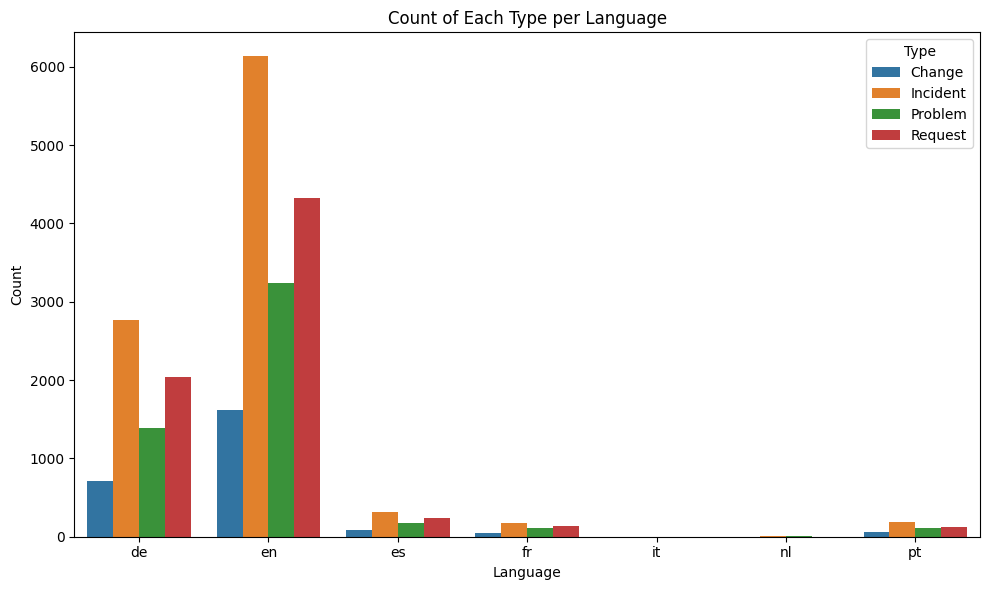

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=type_counts_per_language, x='language', y='count', hue='type')


# Style the plot
plt.title('Count of Each Type per Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.legend(title='Type')
plt.tight_layout()

# Show it
plt.show()

# Handle imbalanced data

In [32]:
# !pip install imblearn

# TF-IDF with SMOTE
# Logistic Regression with GridSearchCV

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

df = final_df_masked
X = df['email_translated']
y = df['type']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#TF-IDF → SMOTE → LogisticRegression
pipe = ImbPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(
        solver='saga',
        class_weight='balanced',
        max_iter=500,
        n_jobs=-1
    ))
])


param_grid = {
    'clf__C': [0.1, 1.0, 10.0]

}
search = GridSearchCV(
    pipe, param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)
search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Train macro-F1:", search.best_score_)

y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best params: {'clf__C': 10.0}
Train macro-F1: 0.8465877056821754
              precision    recall  f1-score   support

      Change     0.8857    0.8611    0.8732       504
    Incident     0.8837    0.8290    0.8555      2117
     Problem     0.6906    0.7746    0.7303      1007
     Request     0.9197    0.9351    0.9274      1372

    accuracy                         0.8504      5000
   macro avg     0.8450    0.8500    0.8466      5000
weighted avg     0.8550    0.8504    0.8518      5000

Confusion Matrix:
 [[ 434   16    9   45]
 [  10 1755  316   36]
 [   9  187  780   31]
 [  37   28   24 1283]]



# Sample Testing

In [130]:
from textwrap import indent
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def test_classification_pipeline(raw_email):
    masked_email, masked_entities = mask_text(raw_email)
    tfidf = search.best_estimator_.named_steps['tfidf']
    X_test_tfidf = tfidf.transform([masked_email])
    clf = search.best_estimator_.named_steps['clf']
    prediction = clf.predict(X_test_tfidf)[0]
    probabilities = clf.predict_proba(X_test_tfidf)[0]
    return {
        "input_email_body": raw_email,
        "list_of_masked_entities": masked_entities,
        "masked_email": masked_email,
        "category_of_the_email": prediction,
    }

import json
test_email = """Subject: Software Still Crashes on Mac After Update
Hi, even after installing the latest patch, the software continues to crash when loading large files. This is affecting our design workflow. Please provide a fix or rollback steps.
My name is Tina Roberts. You can reach me at tina@creativeco.com.
"""

result = test_classification_pipeline(test_email)
print(json.dumps(result, indent=4))

{
    "input_email_body": "Subject: Software Still Crashes on Mac After Update\nHi, even after installing the latest patch, the software continues to crash when loading large files. This is affecting our design workflow. Please provide a fix or rollback steps.\nMy name is Tina Roberts. You can reach me at tina@creativeco.com.\n",
    "list_of_masked_entities": [
        {
            "position": [
                244,
                256
            ],
            "classification": "full_name",
            "entity": "Tina Roberts"
        },
        {
            "position": [
                278,
                297
            ],
            "classification": "email",
            "entity": "tina@creativeco.com"
        }
    ],
    "masked_email": "Subject: Software Still Crashes on Mac After Update\nHi, even after installing the latest patch, the software continues to crash when loading large files. This is affecting our design workflow. Please provide a fix or rollback steps.\nMy n

# Saving model

In [61]:
import joblib
joblib.dump(search.best_estimator_, "final_pipeline.pkl")


['final_pipeline.pkl']

In [131]:
import joblib
model = joblib.load("final_pipeline.pkl")

test_email = """Subject: Software Still Crashes on Mac After Update
Hi, even after installing the latest patch, the software continues to crash when loading large files. This is affecting our design workflow. Please provide a fix or rollback steps.
My name is Tina Roberts. You can reach me at tina@creativeco.com.
"""
y_pred = model.predict([test_email])[0]
masked_email, masked_entities = mask_text(test_email)

result = {
        "input_email_body": test_email,
        "list_of_masked_entities": masked_entities,
        "masked_email": masked_email,
        "category_of_the_email": y_pred,
    }
result

{'input_email_body': 'Subject: Software Still Crashes on Mac After Update\nHi, even after installing the latest patch, the software continues to crash when loading large files. This is affecting our design workflow. Please provide a fix or rollback steps.\nMy name is Tina Roberts. You can reach me at tina@creativeco.com.\n',
 'list_of_masked_entities': [{'position': [244, 256],
   'classification': 'full_name',
   'entity': 'Tina Roberts'},
  {'position': [278, 297],
   'classification': 'email',
   'entity': 'tina@creativeco.com'}],
 'masked_email': 'Subject: Software Still Crashes on Mac After Update\nHi, even after installing the latest patch, the software continues to crash when loading large files. This is affecting our design workflow. Please provide a fix or rollback steps.\nMy name is [full_name]. You can reach me at [email].\n',
 'category_of_the_email': 'Problem'}